<font color=Crimson><p style='font-size:32px;text-align:center'><b>Fake News Detection</b></p></font>

<h3><font color=DarkCyan>What is Fake News ?</font></h3>
- A type of yellow journalism, fake news encapsulates pieces of news that may be hoaxes and is generally spread through social media and other online media. This is often done to further or impose certain ideas and is often achieved with political agendas. Such news items may contain false and/or exaggerated claims, and may end up being viralized by algorithms, and users may end up in a filter bubble.


- The dataset has a shape of 6335×4. The first column identifies the news, the second and third are the title and text, and the fourth column has labels denoting whether the news is REAL or FAKE. you can download it here.


- **Source:** <a href="https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view">Click here to download</a>

<font color=DodgerBlue><h3>Loading and Reading Data</h3></font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("D:/Case Studies/Fake News Detection/news.csv")

In [2]:
print("NUMBER OF DATAPOINTS -",data.shape[0])
print("NUMBER OF FEATURES -",data.shape[1])
print("-"*10)
print("FEATURES/COLUMNS -",data.columns)

NUMBER OF DATAPOINTS - 6335
NUMBER OF FEATURES - 4
----------
FEATURES/COLUMNS - Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


In [3]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
Unnamed: 0    6335 non-null int64
title         6335 non-null object
text          6335 non-null object
label         6335 non-null object
dtypes: int64(1), object(3)
memory usage: 198.0+ KB


In [5]:
data['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

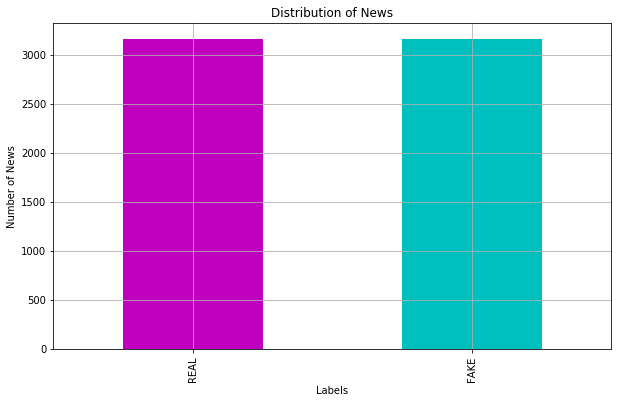

In [6]:
label_value = data['label'].value_counts()

plt.figure(figsize=(10,6))
my_colors = ['m','c']
label_value.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("Labels")
plt.ylabel("Number of News")
plt.title("Distribution of News")
plt.show()

In [9]:
data['text'][1]

'Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr \nThere are two fundamental truths in this world: Paul Ryan desperately wants to be president. And Paul Ryan will never be president. Today proved it. \nIn a particularly staggering example of political cowardice, Paul Ryan re-re-re-reversed course and announced that he was back on the Trump Train after all. This was an aboutface from where he was a few weeks ago. He had previously declared he would not be supporting or defending Trump after a tape was made public in which Trump bragged about assaulting women. Suddenly, Ryan was appearing at a pro-Trump rally and boldly declaring that he already sent in his vote to make him President of the United States. It was a surreal moment. The figurehead of the Republican Party dosed himself in gasoline, got up on a stage on a chilly afternoon in Wisconsin, and lit a match. . @SpeakerRyan says he voted for @realDonaldTrump : “Republicans, it is time to come home” ht

<font color=DodgerBlue><h3>Data Preprocessing</h3></font>

In [10]:
from nltk.corpus import stopwords
import nltk
import re

#loading stopwords from nltk library
stop_words = set(stopwords.words('english'))

def txt_preprocessing(total_txt, idx, colm, df):
    if(type(total_txt) is not int):
        string = ""
        
        #replace_every_special_char_with_space
        total_txt = re.sub('[^a-zA-Z0-9\n]',' ',total_txt)
        
        #replace_multiple_spaces_with_single_space
        total_txt = re.sub('\s+',' ',total_txt)
        
        #converting_all_the_chars_into_lower_case
        total_txt = total_txt.lower()
        
        for word in total_txt.split():
            #if_the_word_is_a_not_a_stop_word_then_retain_that_word_from_the_data
            if not word in stop_words:
                string += word + " "
        
        df[colm][idx] = string

In [11]:
#data_text_processing_stage_
for index, row in data.iterrows():
    if type(row['text']) is str:
        txt_preprocessing(row['text'], index, 'text', data)
    else:
        print("THERE IS NO TEXT DESCRIPTION FOR ID :",index)

data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,daniel greenfield shillman journalism fellow f...,FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,u secretary state john f kerry said monday sto...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,kaydee king kaydeeking november 9 2016 lesson ...,FAKE
4,875,The Battle of New York: Why This Primary Matters,primary day new york front runners hillary cli...,REAL


In [12]:
data['text'][1]

'google pinterest digg linkedin reddit stumbleupon print delicious pocket tumblr two fundamental truths world paul ryan desperately wants president paul ryan never president today proved particularly staggering example political cowardice paul ryan reversed course announced back trump train aboutface weeks ago previously declared would supporting defending trump tape made public trump bragged assaulting women suddenly ryan appearing pro trump rally boldly declaring already sent vote make president united states surreal moment figurehead republican party dosed gasoline got stage chilly afternoon wisconsin lit match speakerryan says voted realdonaldtrump republicans time come home https co vytt49yvoe pic twitter com wcvscg4a5i abc news politics abcpolitics november 5 2016 democratic party asked better moment film ryan chances ever becoming president went zero instant wreckage trump leave behind wake cravenly backed campaign recover ryan career manages limp way 2020 dnc tape locked loaded

In [14]:
preprocessed_data = pd.DataFrame({'News':data['text'], 'Label':data['label']})

preprocessed_data.head()

,News,Label
0,daniel greenfield shillman journalism fellow f...,FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,u secretary state john f kerry said monday sto...,REAL
3,kaydee king kaydeeking november 9 2016 lesson ...,FAKE
4,primary day new york front runners hillary cli...,REAL


<font color=DodgerBlue><h3>Train-Test Split</h3></font>

In [15]:
#split_your_data
from sklearn.model_selection import train_test_split

X = preprocessed_data['News']
Y = preprocessed_data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)
                                                    
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)                                         

In [16]:
print("NUMBER OF DATA POINTS IN TRAIN DATA :", X_train.shape[0])
print("NUMBER OF DATA POINTS IN TEST DATA :", X_test.shape[0])
print("NUMBER OF DATA POINTS IN CROSS VALIDATION DATA :", X_cv.shape[0])

NUMBER OF DATA POINTS IN TRAIN DATA : 4054
NUMBER OF DATA POINTS IN TEST DATA : 1267
NUMBER OF DATA POINTS IN CROSS VALIDATION DATA : 1014


<font color=DodgerBlue><h3>TFIDF of Text Data</h3></font>

In [18]:
#perform_tfidf_vectorization_of_text_data
from sklearn.feature_extraction.text import TfidfVectorizer

text_vec = TfidfVectorizer(min_df=10, max_features=8000)
text_vec.fit(X_train.values)

train_text = text_vec.transform(X_train.values)
test_text = text_vec.transform(X_test.values)
cv_text = text_vec.transform(X_cv.values)

print(train_text.shape)
print(test_text.shape)
print(cv_text.shape)

(4054, 8000)
(1267, 8000)
(1014, 8000)


<font color=DodgerBlue><h3>Confusion Matrix</h3></font>

In [19]:
#this_function_plots_the_confusion_matrices_given_y_i_and_y_i_hat_
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(test_y, predict_y):

    C = confusion_matrix(test_y, predict_y) #confusion_mat
    A =(((C.T)/(C.sum(axis=1))).T) #recall_mat
    B =(C/C.sum(axis=0)) #precision_mat
    
    labels = [0,1]
    
    #representing_C_in_heatmap_format
    print("-"*40, "Confusion Matrix", "-"*40)
    plt.figure(figsize=(8,6))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #representing_B_in_heatmap_format
    print("-"*40, "Precision Matrix (Columm Sum=1)", "-"*40)
    plt.figure(figsize=(8,6))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #representing_A_in_heatmap_format
    print("-"*40, "Recall Matrix (Row Sum=1)", "-"*40)
    plt.figure(figsize=(8,6))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

<font color=DarkGreen><h3>1. Logistic Regression</h3></font>

For values of alpha = 1e-05 The log loss is: 0.17513832497853515
For values of alpha = 0.0001 The log loss is: 0.18706452537668808
For values of alpha = 0.001 The log loss is: 0.24416623538096635
For values of alpha = 0.01 The log loss is: 0.31881950132926046
For values of alpha = 0.1 The log loss is: 0.36853111669877003
For values of alpha = 1 The log loss is: 0.3837682098347193


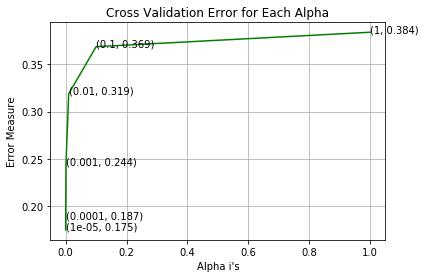

For Values of Best Alpha = 1e-05 The Train Log Loss is: 0.06242126823966468
For Values of Best Alpha = 1e-05 The Test Log Loss is: 0.18495352791545044
For Values of Best Alpha = 1e-05 The Cross Validation Log Loss is: 0.17513832497853515


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

#train a logistic regression + calibration model using text features which are one-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42) #loss='log'_means_logistic_regression
    clf.fit(train_text, y_train)
    
    lr_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    lr_sig_clf.fit(train_text, y_train)
    
    predict_y = lr_sig_clf.predict_proba(cv_text)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    
    print('For values of alpha =',i,"The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
    
plt.grid()
plt.title("Cross Validation Error for Each Alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error Measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text, y_train)

lr_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
lr_sig_clf.fit(train_text, y_train)

predict_y = lr_sig_clf.predict_proba(train_text)
print('For Values of Best Alpha =', alpha[best_alpha],"The Train Log Loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = lr_sig_clf.predict_proba(test_text)
print('For Values of Best Alpha =', alpha[best_alpha],"The Test Log Loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = lr_sig_clf.predict_proba(cv_text)
print('For Values of Best Alpha =', alpha[best_alpha],"The Cross Validation Log Loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

---------------------------------------- Confusion Matrix ----------------------------------------


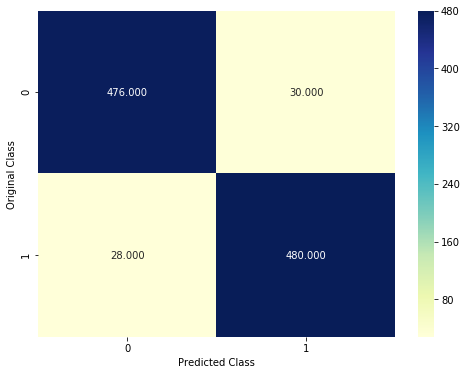

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


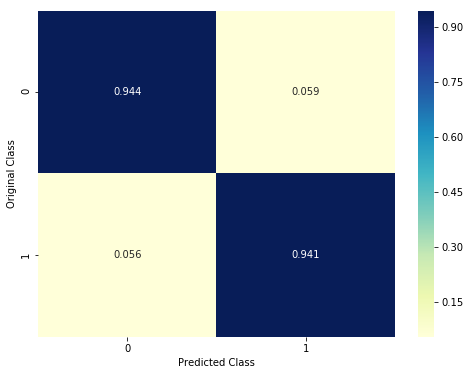

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


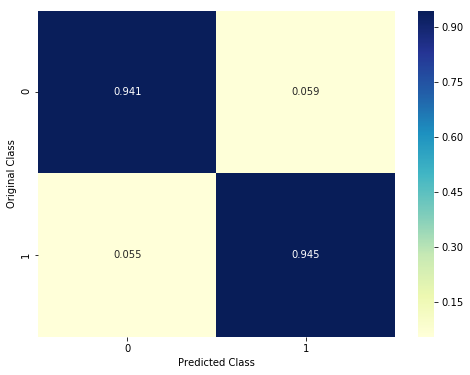

In [21]:
plot_confusion_matrix(y_cv, lr_sig_clf.predict(cv_text.toarray()))

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_cv, lr_sig_clf.predict(cv_text)))

             precision    recall  f1-score   support

       FAKE       0.94      0.94      0.94       506
       REAL       0.94      0.94      0.94       508

avg / total       0.94      0.94      0.94      1014



In [27]:
from sklearn.metrics import accuracy_score
lr_test_accuracy = (lr_sig_clf.score(test_text, y_test)*100)
print("Logistic Regression Test Accuracy -",lr_test_accuracy)

Logistic Regression Test Accuracy - 93.52801894238358


<font color=DarkGreen><h3>2. Passive Aggressive Classifier</h3></font>

In [28]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac_model = PassiveAggressiveClassifier(max_iter=50)

pac_model.fit(train_text, y_train)

y_pred = pac_model.predict(test_text)

pac_test_accuracy = (pac_model.score(test_text, y_test)*100)
print("Test Accuracy -",pac_test_accuracy)

Test Accuracy - 93.44909234411996


In [30]:
print(classification_report(y_cv, pac_model.predict(cv_text)))

             precision    recall  f1-score   support

       FAKE       0.93      0.93      0.93       506
       REAL       0.93      0.94      0.93       508

avg / total       0.93      0.93      0.93      1014



---------------------------------------- Confusion Matrix ----------------------------------------


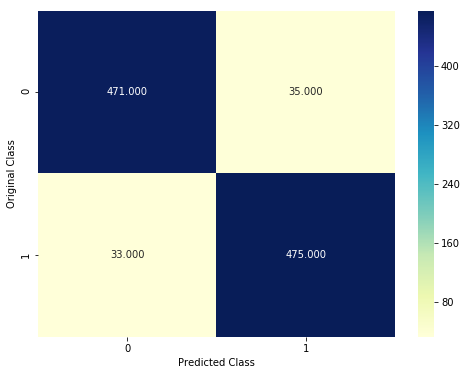

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


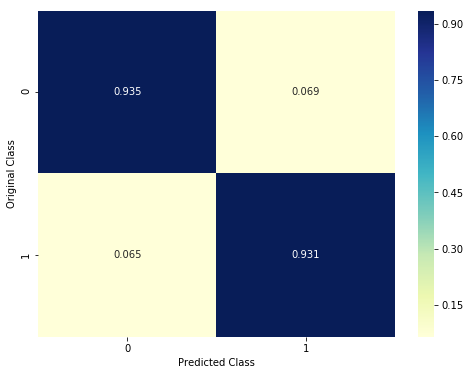

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


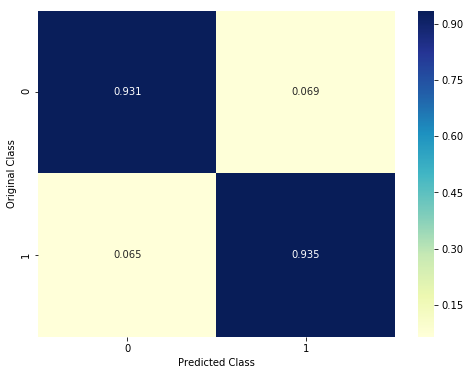

In [31]:
plot_confusion_matrix(y_cv, pac_model.predict(cv_text.toarray()))